<a href="https://colab.research.google.com/github/salmaelzeky/AMIT-AI26/blob/main/Bicycle_Detection_last_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pathlib
import cv2
import math
from PIL import Image
from google.protobuf import text_format
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.12
Tensorflow version: 2.7.0
Keras version: 2.7.0


## Loading the model


In [ ]:
# Create cache folder.
!mkdir .tmp

In [ ]:
# Loads the module from internet, unpacks it and initializes a Tensorflow saved model.
def load_model(model_name):
    model_url = 'http://download.tensorflow.org/models/object_detection/' + model_name + '.tar.gz'
    
    model_dir = tf.keras.utils.get_file(
        fname=model_name, 
        origin=model_url,
        untar=True,
        cache_dir=pathlib.Path('.tmp').absolute()
    )
    model = tf.saved_model.load(model_dir + '/saved_model')
    
    return model

In [ ]:
MODEL_NAME = 'ssdlite_mobilenet_v2_coco_2018_05_09'
saved_model = load_model(MODEL_NAME)

51036160/51025348 [==============================] - 0s 0us/step
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
# Exploring model signatures.
saved_model.signatures

_SignatureMap({'serving_default': <ConcreteFunction pruned(inputs) at 0x7F89FCDF0D90>})

In [ ]:
# Loading default model signature.
model = saved_model.signatures['serving_default']

In [ ]:
! sudo apt-get install protobuf-compiler python3-pil python3-lxml
! python3-tk git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python3-bs4 python3-chardet python3-html5lib python3-olefile
  python3-pkg-resources python3-six python3-webencodings
Suggested packages:
  python3-genshi python3-lxml-dbg python-lxml-doc python-pil-doc
  python3-pil-dbg python3-setuptools
The following NEW packages will be installed:
  python3-bs4 python3-chardet python3-html5lib python3-lxml python3-olefile
  python3-pil python3-pkg-resources python3-six python3-webencodings
0 upgraded, 9 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,811 kB of archives.
After this operation, 7,705 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-bs4 all 4.6.0-1 [67.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2

In [ ]:
! pip3 install pillow Cython lxml jupyter matplotlib contextlib2

In [ ]:
! pip3 install pycocotools

In [ ]:
! git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 68412, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 68412 (delta 33), reused 49 (delta 25), pack-reused 68350
Receiving objects: 100% (68412/68412), 576.93 MiB | 30.45 MiB/s, done.
Resolving deltas: 100% (48163/48163), done.


In [ ]:
cd models/research

/content/models/research


In [ ]:
# From tensorflow/models/research/
! protoc object_detection/protos/*.proto --python_out=.

In [ ]:
# From tensorflow/models/research/
! export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim

In [ ]:
 
from tensorflow import keras
# Define a simple sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Define a simple sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.


Epoch 1/10
29/32 [==========================>...] - ETA: 0s - loss: 1.2917 - sparse_categorical_accuracy: 0.6088
Epoch 00001: saving model to training_1/cp.ckpt
32/32 [==============================] - 1s 19ms/step - loss: 1.2437 - sparse_categorical_accuracy: 0.6240 - val_loss: 0.8138 - val_sparse_categorical_accuracy: 0.7440
Epoch 2/10
29/32 [==========================>...] - ETA: 0s - loss: 0.4516 - sparse_categorical_accuracy: 0.8728
Epoch 00002: saving model to training_1/cp.ckpt
32/32 [==============================] - 0s 10ms/step - loss: 0.4503 - sparse_categorical_accuracy: 0.8740 - val_loss: 0.5744 - val_sparse_categorical_accuracy: 0.8230
Epoch 3/10
29/32 [==========================>...] - ETA: 0s - loss: 0.3114 - sparse_categorical_accuracy: 0.9149
Epoch 00003: saving model to training_1/cp.ckpt
32/32 [==============================] - 0s 10ms/step - loss: 0.3056 - sparse_categorical_accuracy: 0.9160 - val_loss: 0.4825 - val_sparse_categorical_accuracy: 0.8450
Epoch 4/10
29

In [ ]:
os.listdir(checkpoint_dir)


['checkpoint', 'cp.ckpt.index', 'cp.ckpt.data-00000-of-00001']

In [ ]:
# Create a basic model instance
model = create_model()

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))


32/32 - 0s - loss: 2.3890 - sparse_categorical_accuracy: 0.1390 - 196ms/epoch - 6ms/step
Untrained model, accuracy: 13.90%


In [ ]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


32/32 - 0s - loss: 0.4380 - sparse_categorical_accuracy: 0.8700 - 95ms/epoch - 3ms/step
Restored model, accuracy: 87.00%


In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size)

# Create a new model instance
model = create_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model.fit(train_images, 
          train_labels,
          epochs=50, 
          batch_size=batch_size, 
          callbacks=[cp_callback],
          validation_data=(test_images, test_labels),
          verbose=0)



Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [ ]:
os.listdir(checkpoint_dir)


['cp-0025.ckpt.index',
 'cp-0040.ckpt.data-00000-of-00001',
 'cp-0050.ckpt.index',
 'cp-0000.ckpt.data-00000-of-00001',
 'cp-0015.ckpt.index',
 'cp-0035.ckpt.data-00000-of-00001',
 'checkpoint',
 'cp-0030.ckpt.data-00000-of-00001',
 'cp-0010.ckpt.data-00000-of-00001',
 'cp-0015.ckpt.data-00000-of-00001',
 'cp-0000.ckpt.index',
 'cp-0045.ckpt.index',
 'cp-0035.ckpt.index',
 'cp-0025.ckpt.data-00000-of-00001',
 'cp-0050.ckpt.data-00000-of-00001',
 'cp-0040.ckpt.index',
 'cp-0005.ckpt.index',
 'cp-0030.ckpt.index',
 'cp-0020.ckpt.index',
 'cp-0020.ckpt.data-00000-of-00001',
 'cp-0005.ckpt.data-00000-of-00001',
 'cp-0010.ckpt.index',
 'cp-0045.ckpt.data-00000-of-00001']

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest


'training_2/cp-0050.ckpt'

In [ ]:
# Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


32/32 - 0s - loss: 0.4900 - sparse_categorical_accuracy: 0.8770 - 217ms/epoch - 7ms/step
Restored model, accuracy: 87.70%


### Loading and parsing the labels

In [ ]:
from object_detection.utils import label_map_util

def load_labels(labels_name):
    labels_url = 'https://github.com/tensorflow/models/tree/master/research/object_detection/data' + labels_name
    
    labels_path = tf.keras.utils.get_file(
        fname=labels_name, 
        origin=labels_url,
        cache_dir=pathlib.Path('.tmp').absolute()
    )
    
    labels_file = open(labels_path, 'r')
    labels_string = labels_file.read()
    
    labels_map = label_map_util.load_labelmap('/content/models/research/object_detection/data/mscoco_label_map.pbtxt')
    category_index = label_map_util.convert_label_map_to_categories(labels_map, max_num_classes=4, use_display_name=True)
    try:
        text_format.Merge(labels_string, labels_map)
    except text_format.ParseError:
        labels_map.ParseFromString(labels_string)
    
    labels_dict = {}
    for item in labels_map.item:
        labels_dict[item.id] = item.display_name
    
    return labels_dict

In [ ]:
LABELS_NAME = '/content/models/research/object_detection/data/mscoco_label_map.pbtxt'
labels = load_labels(LABELS_NAME)
labels

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

## Exploring the model

In [ ]:
# List model files
!ls -la .tmp/datasets/ssdlite_mobilenet_v2_coco_2018_05_09

ls: cannot access '.tmp/datasets/ssdlite_mobilenet_v2_coco_2018_05_09': No such file or directory


In [ ]:
# Check model pipeline.
!cat .tmp/datasets/ssdlite_mobilenet_v2_coco_2018_05_09/pipeline.config

cat: .tmp/datasets/ssdlite_mobilenet_v2_coco_2018_05_09/pipeline.config: No such file or directory


In [ ]:
model.inputs

[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]

In [ ]:
model.outputs

[<tf.Tensor 'detection_boxes:0' shape=(None, 100, 4) dtype=float32>,
 <tf.Tensor 'detection_classes:0' shape=(None, 100) dtype=float32>,
 <tf.Tensor 'detection_scores:0' shape=(None, 100) dtype=float32>,
 <tf.Tensor 'num_detections:0' shape=(None,) dtype=float32>]

## Loading test images

In [ ]:
def display_image(image_np):
    plt.figure()
    plt.imshow(image_np)

In [ ]:
TEST_IMAGES_DIR_PATH = pathlib.Path('/content/mydata')
TEST_IMAGE_PATHS = sorted(list(TEST_IMAGES_DIR_PATH.glob('*.jpg')))
TEST_IMAGE_PATHS

[PosixPath('/content/mydata/image1.jpg'),
 PosixPath('/content/mydata/image2.jpg'),
 PosixPath('/content/mydata/image3.jpg'),
 PosixPath('/content/mydata/image4.jpg'),
 PosixPath('/content/mydata/image5.jpg')]

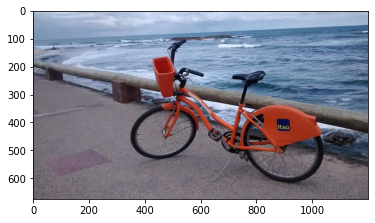

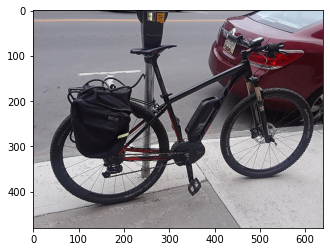

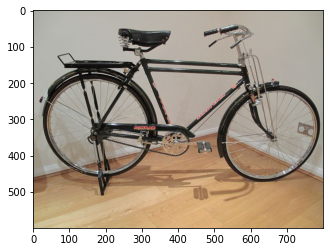

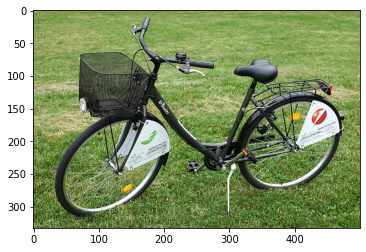

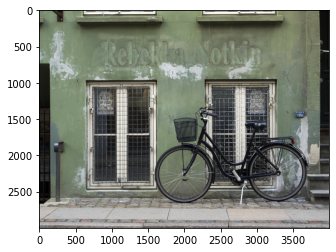

In [ ]:
for image_path in TEST_IMAGE_PATHS:
    image_np = mpimg.imread(image_path)
    display_image(image_np)

## Running the model

In [ ]:
def detect_objects_on_image(image, model):
    image = np.asarray(image)
    input_tensor = tf.convert_to_tensor(image)
    # Adding one more dimension since model expect a batch of images.
    input_tensor = input_tensor[tf.newaxis, ...]

    output_dict = model(input_tensor)

    num_detections = int(output_dict['num_detections'])
    output_dict = {
        key:value[0, :num_detections].numpy() 
        for key,value in output_dict.items()
        if key != 'num_detections'
    }
    output_dict['num_detections'] = num_detections
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
    
    return output_dict

In [ ]:
def draw_detections_on_image(image, detections, labels):
    image_with_detections = image
    width, height, channels = image_with_detections.shape
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0, 255, 0)
    label_padding = 5
    
    num_detections = detections['num_detections']
    if num_detections > 0:
        for detection_index in range(num_detections):
            detection_score = detections['detection_scores'][detection_index]
            detection_box = detections['detection_boxes'][detection_index]
            detection_class = detections['detection_classes'][detection_index]
            if labels[detection_class] == 'bicycle' :
               detection_label = labels[detection_class]
            else : 
               detection_label = ""  
            detection_label_full = detection_label + ' ' + str(math.floor(100 * detection_score)) + '%'
            
            y1 = int(width * detection_box[0])
            x1 = int(height * detection_box[1])
            y2 = int(width * detection_box[2])
            x2 = int(height * detection_box[3])
                        
            # Detection rectangle. 
            if labels[detection_class] == 'bicycle' :   
                 image_with_detections = cv2.rectangle(
                      image_with_detections,
                      (x1, y1),
                      (x2, y2),
                      color,
                      3
                      )
            
            # Label background.
            label_size = cv2.getTextSize(
                detection_label_full,
                cv2.FONT_HERSHEY_COMPLEX,
                0.7,
                2
            )
            image_with_detections = cv2.rectangle(
                image_with_detections,
                (x1, y1 - label_size[0][1] - 2 * label_padding),
                (x1 + label_size[0][0] + 2 * label_padding, y1),
                color,
                -1
            )
            
            # Label text.
            cv2.putText(
                image_with_detections,
                detection_label_full,
                (x1 + label_padding, y1 - label_padding),
                font,
                0.7,
                (0, 0, 0),
                1,
                cv2.LINE_AA
            )
            
    return image_with_detections

In [ ]:
# Example of how detections dictionary looks like.
image_np = np.array(Image.open(TEST_IMAGE_PATHS[1]))
detections = detect_objects_on_image(image_np, model)
detections

{'detection_boxes': array([[0.00740702, 0.612399  , 0.46366507, 1.        ],
        [0.06257644, 0.06622493, 0.89953935, 0.9849671 ]], dtype=float32),
 'detection_classes': array([3, 2]),
 'detection_scores': array([0.9472334 , 0.91139317], dtype=float32),
 'num_detections': 2}

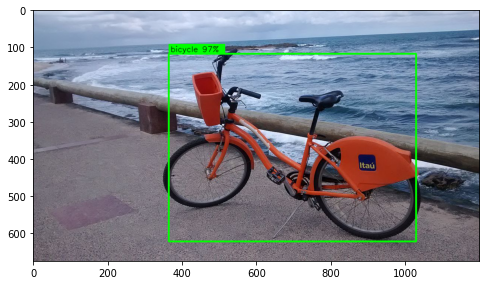

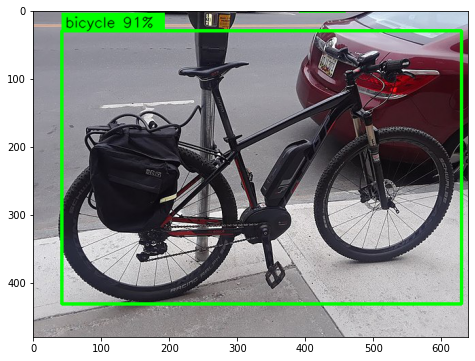

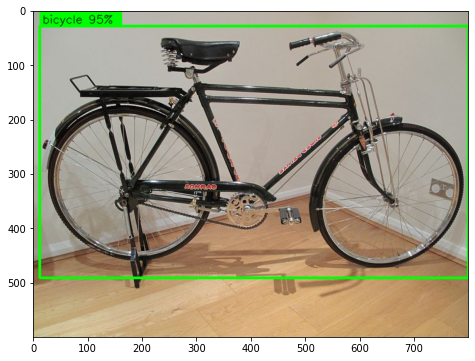

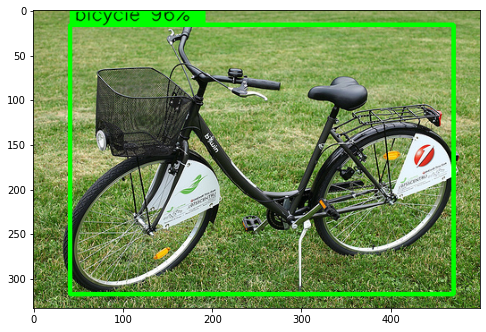

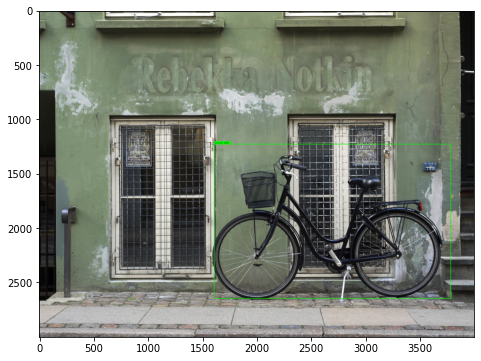

In [ ]:
for image_path in TEST_IMAGE_PATHS:
    image_np = np.array(Image.open(image_path))
    detections = detect_objects_on_image(image_np, model)
    image_with_detections = draw_detections_on_image(image_np, detections, labels)
    plt.figure(figsize=(8, 6))
    plt.imshow(image_with_detections)